# Sanity check flow experiments

In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Read files

In [28]:
data_path = '~/Downloads/'

In [37]:
dfs[0]

,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,Comp-525_50 Blue E-A,Comp-582_15 YG D-A,Time
0,193140,174141,72685.9,125197.0,113229,72462.9,5735.030,34.65540,0.204
1,178785,164276,71324.1,132587.0,118188,73520.5,955.670,21.44260,0.211
2,202954,183106,72639.8,117493.0,102918,74816.9,4893.910,13.19160,0.217
3,192388,176681,71362.1,116655.0,104916,72868.5,4987.840,20.69410,0.220
4,184230,164604,73349.9,109839.0,97813,73593.7,1693.030,-5.48427,0.223
...,...,...,...,...,...,...,...,...,...
8168,202768,189997,69941.2,116032.0,109037,69740.3,970.877,3.10978,27.081
8169,218487,204810,69912.4,127741.0,109006,76800.0,885.159,40.25570,27.094
8170,164100,145750,73787.2,93103.1,89046,68521.9,4493.480,3.86589,27.097
8171,176615,161099,71847.9,90504.0,85471,69395.1,1929.850,11.39180,27.099


In [43]:
fnames = [
    "export_Specimen_001_Tube_001_Lymphocytes.csv",
    "export_Specimen_001_Tube_002_Lymphocytes.csv",
    "export_Specimen_001_Tube_003_Lymphocytes.csv",
    "export_Specimen_001_Tube_004_Lymphocytes.csv",
    "export_Specimen_001_Tube_005_Lymphocytes.csv",]
column_names = [
    ('CD4_blue', 'None_YG'),
    ('CD45_blue', 'None_YG'),
    ('CD4+CD45_blue', 'None_YG'),
    ('None_blue', 'CD4_YG'),
    ('CD4+CD45_blue', 'CD4_YG')
]
color_names = ['Comp-525_50 Blue E-A', 'Comp-582_15 YG D-A']

In [44]:
def clean_df(df):
    
    df = df.rename(columns={'Comp-525_50 Blue E-A':'blue', 'Comp-582_15 YG D-A':'yg'})
    
    return df

In [73]:
dfs = [pd.read_csv(data_path + fname)[color_names].rename(columns=dict(zip(color_names, column_names[i]))) for i, fname in enumerate(fnames)]

### Measuring CD4 on two channels

Voltage control required

/Users/mincheolkim/opt/miniconda3/envs/single_cell/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mincheolkim/opt/miniconda3/envs/single_cell/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'log-scale')

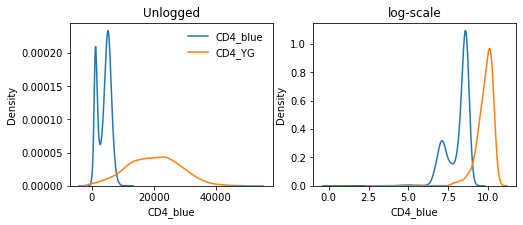

In [64]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.kdeplot( dfs[0]['CD4_blue'] , label='CD4_blue')
sns.kdeplot( dfs[3]['CD4_YG'] , label='CD4_YG')
plt.title('Unlogged')
plt.legend(frameon=False)
plt.subplot(1, 2, 2)
sns.kdeplot( np.log(dfs[0]['CD4_blue'] ), label='CD4_blue')
sns.kdeplot( np.log(dfs[3]['CD4_YG'] ), label='CD4_YG')
plt.title('log-scale')

### Using all blue channel, CD4, CD45 and CD4+CD45 in 3 separate samples

/Users/mincheolkim/opt/miniconda3/envs/single_cell/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'log-scale')

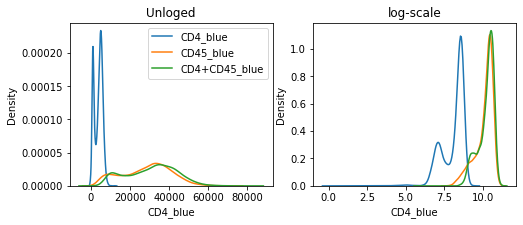

In [74]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.kdeplot( dfs[0]['CD4_blue'] , label='CD4_blue')
sns.kdeplot( dfs[1]['CD45_blue'] , label='CD45_blue')
sns.kdeplot( dfs[2]['CD4+CD45_blue'], label='CD4+CD45_blue' )
plt.title('Unloged')
plt.legend()
plt.subplot(1, 2, 2)
sns.kdeplot( np.log(dfs[0]['CD4_blue'] ) , label='CD4_blue')
sns.kdeplot( np.log(dfs[1]['CD45_blue'] ) , label='CD45_blue')
sns.kdeplot( np.log(dfs[2]['CD4+CD45_blue'] ) , label='CD4+CD45_blue')
plt.title('log-scale')

### Assuming independence, how do the CD4+CD45_blue compare to adding CD45 and CD4 together?

The green and orange actually do look a lot similar to each other than either of those are to green, kinda good news?

In [70]:
indep_sum = dfs[0]['CD4_blue'].sample(5000).values+dfs[1]['CD45_blue'].sample(5000).values

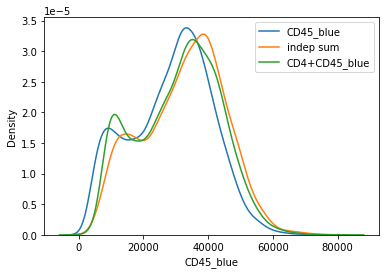

In [78]:
sns.kdeplot(dfs[1]['CD45_blue'], label='CD45_blue')
sns.kdeplot(indep_sum, label='indep sum')
sns.kdeplot( dfs[2]['CD4+CD45_blue'], label='CD4+CD45_blue' )
plt.legend()

### Check the two summed samples

They look...kinda different? I wouldnt really expect a huge shift since the CD4 signal is so much lower than CD45

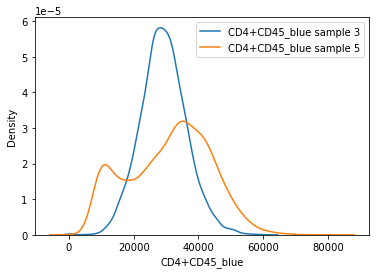

In [88]:
sns.kdeplot(dfs[-1]['CD4+CD45_blue'], label='CD4+CD45_blue sample 3')
sns.kdeplot( dfs[2]['CD4+CD45_blue'], label='CD4+CD45_blue sample 5' )
plt.legend()

### Compre CD4 in sample that had an alternate antibody vs single (sample 4 vs 5)

Nice, seems like the it is actually decreasing because ~half of the antibodies are going towards blue channel in sample 5

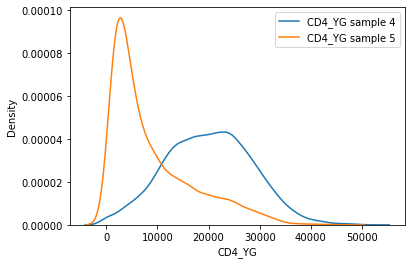

In [93]:
sns.kdeplot(dfs[-2]['CD4_YG'], label='CD4_YG sample 4')
sns.kdeplot(dfs[-1]['CD4_YG'], label='CD4_YG sample 5')
plt.legend()